In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error,classification_report
from sklearn.linear_model import LinearRegression


In [8]:
df = pd.read_csv('/content/drive/MyDrive/EWU Couses/CSE303  Practice-20251121T155013Z-1-001/CSE303  Practice/Fall 2025/CSE303 Lab 6 : Regression/Lab matarials/house_price.csv')
df

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,138.338057,2,2,2,1967,1,0,16,4.296086,5.562583,488496.350722
496,497,195.914028,2,3,1,1977,0,1,45,7.406261,2.845105,657736.921717
497,498,69.433659,1,1,2,2004,0,0,18,8.629724,6.263264,405324.950201
498,499,293.598702,5,1,3,1940,1,0,41,5.318891,16.990684,773035.968028


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  500 non-null    int64  
 1   Square_Feet         500 non-null    float64
 2   Num_Bedrooms        500 non-null    int64  
 3   Num_Bathrooms       500 non-null    int64  
 4   Num_Floors          500 non-null    int64  
 5   Year_Built          500 non-null    int64  
 6   Has_Garden          500 non-null    int64  
 7   Has_Pool            500 non-null    int64  
 8   Garage_Size         500 non-null    int64  
 9   Location_Score      500 non-null    float64
 10  Distance_to_Center  500 non-null    float64
 11  Price               500 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 47.0 KB


In [ ]:
df.isnull().sum()

,0
ID,0
Square_Feet,0
Num_Bedrooms,0
Num_Bathrooms,0
Num_Floors,0
Year_Built,0
Has_Garden,0
Has_Pool,0
Garage_Size,0
Location_Score,0


In [ ]:
df.head()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


In [ ]:
df.corr()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
ID,1.000000,0.051102,0.014511,0.027395,-0.006343,0.028548,-0.005307,-0.076580,-0.000137,-0.045071,-0.006751,0.031774
Square_Feet,0.051102,1.000000,-0.049918,-0.001667,0.056873,-0.055062,-0.000978,0.007530,-0.051598,-0.035270,0.093080,0.558604
Num_Bedrooms,0.014511,-0.049918,1.000000,-0.056808,0.009088,0.031806,0.017429,0.012039,-0.065481,-0.000357,0.040511,0.563973
Num_Bathrooms,0.027395,-0.001667,-0.056808,1.000000,-0.040895,-0.013407,-0.037040,-0.024880,0.055707,-0.013855,-0.082571,0.156689
Num_Floors,-0.006343,0.056873,0.009088,-0.040895,1.000000,0.046922,0.033256,-0.045630,-0.082763,0.019928,0.035164,0.177435
Year_Built,0.028548,-0.055062,0.031806,-0.013407,0.046922,1.000000,0.000693,-0.065056,-0.008105,0.009614,-0.015113,0.418293
Has_Garden,-0.005307,-0.000978,0.017429,-0.037040,0.033256,0.000693,1.000000,-0.087085,-0.037998,0.019130,0.040305,0.109196
Has_Pool,-0.076580,0.007530,0.012039,-0.024880,-0.045630,-0.065056,-0.087085,1.000000,0.011477,-0.088722,0.110382,0.136579
Garage_Size,-0.000137,-0.051598,-0.065481,0.055707,-0.082763,-0.008105,-0.037998,0.011477,1.000000,-0.029939,-0.061407,0.032100
Location_Score,-0.045071,-0.035270,-0.000357,-0.013855,0.019928,0.009614,0.019130,-0.088722,-0.029939,1.000000,0.054446,0.071326


<Axes: >

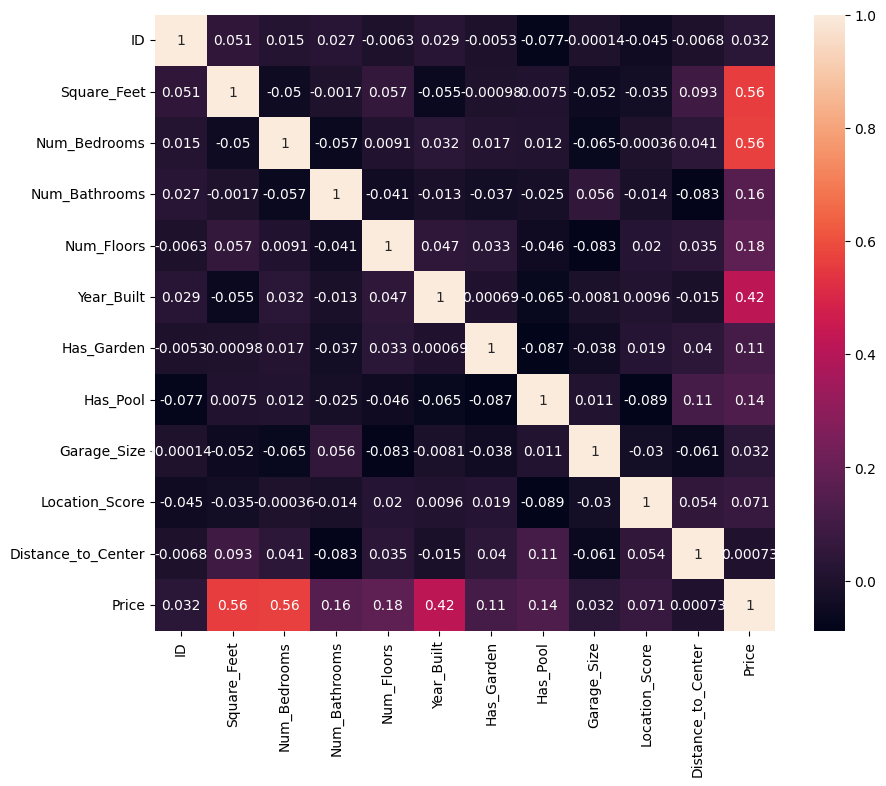

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

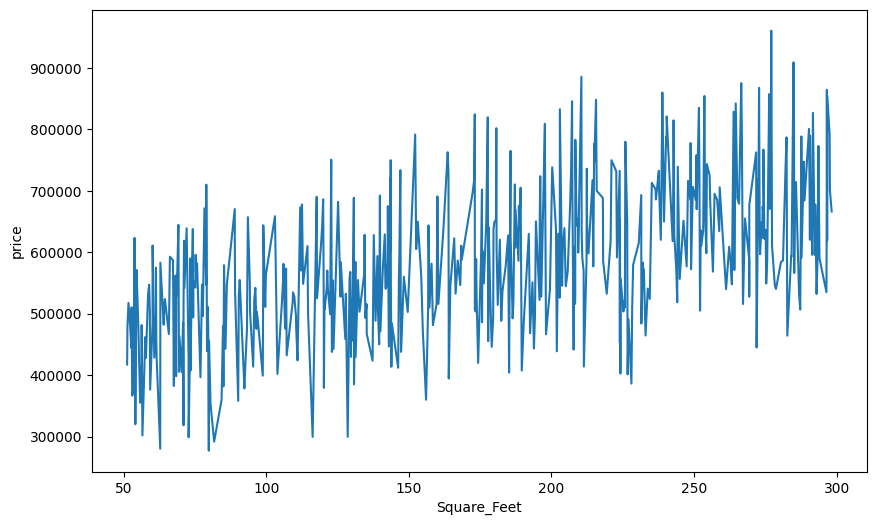

In [ ]:
plt.figure(figsize=(10, 6))
df.groupby('Square_Feet')['Price'].sum().plot()
plt.xlabel('Square_Feet')
plt.ylabel('price')
plt.show()

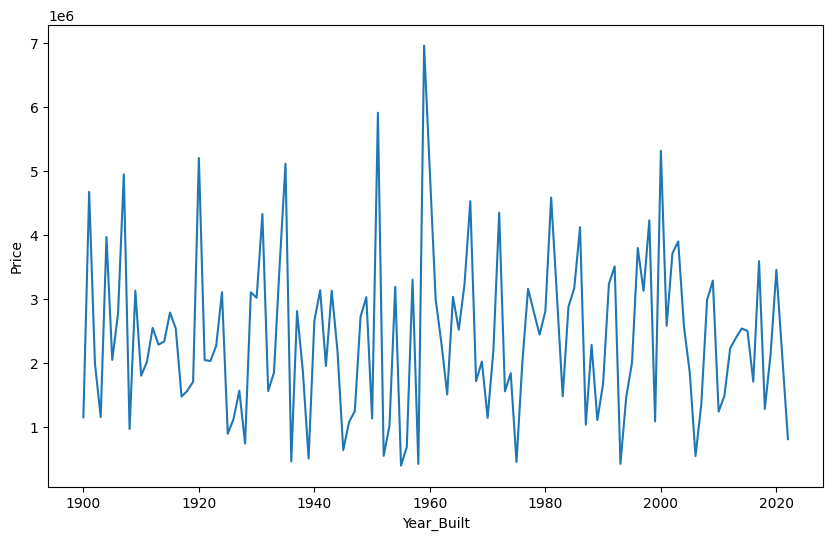

In [ ]:
plt.figure(figsize=(10,6))
df.groupby('Year_Built')['Price'].sum().plot()
plt.xlabel('Year_Built')
plt.ylabel('Price')
plt.show()

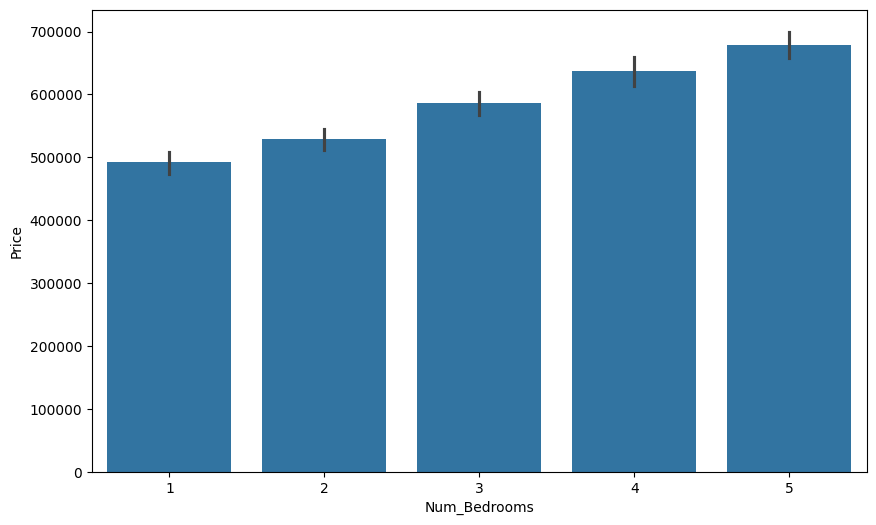

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Num_Bedrooms'],y=df['Price'])
plt.xlabel('Num_Bedrooms')
plt.ylabel('Price')
plt.show()

<ipython-input-13-b5295903c628>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df['Square_Feet'],y=df['Price'], palette='coolwarm')


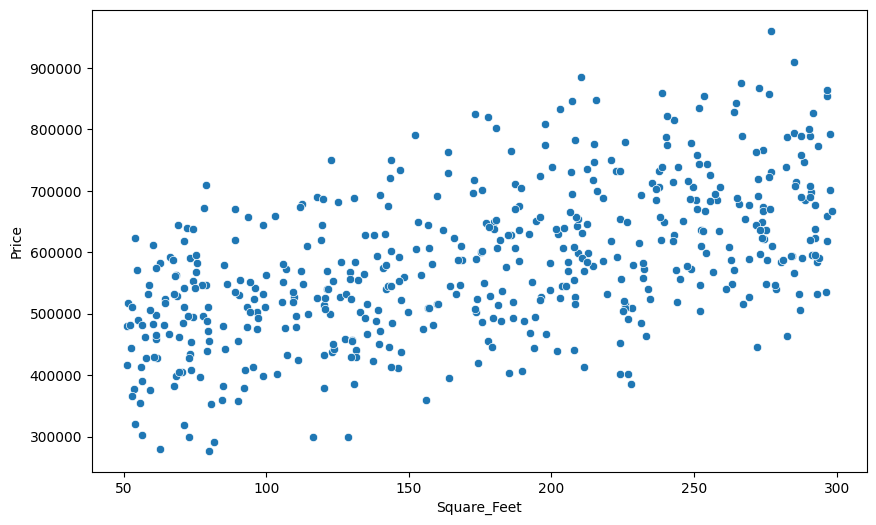

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Square_Feet'],y=df['Price'], palette='coolwarm')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

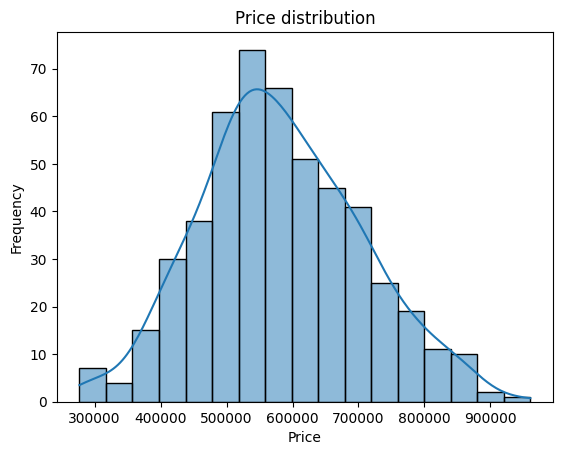

In [ ]:
sns.histplot(df['Price'], kde=True)
plt.title("Price distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# **Linear Regression**

Linear Regression
Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog). There are two main types:

Linear Regression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.



Scikit-learn (Sklearn) is Python's most useful and robust machine learning package. It offers a set of fast tools for machine learning and statistical modeling, such as classification, regression, clustering, and dimensionality reduction, via a Python interface. This mostly Python-written package is based on NumPy, SciPy, and Matplotlib.



What is SKlearn Linear Regression?

Scikit-learn is a Python package that makes it easier to apply a variety of Machine Learning (ML) algorithms for predictive data analysis, such as linear regression.

Linear regression is defined as the process of determining the straight line that best fits a set of dispersed data points:

The line can then be projected to forecast fresh data points. Because of its simplicity and essential features, linear regression is a fundamental Machine Learning method.



Learn More:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
x = df.drop(columns = ['Price'])
y = df['Price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train)
print(y_train)
print(x_test)
print(y_test)

      ID  Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  Year_Built  \
249  250   263.252364             3              3           1        1902   
433  434    75.280669             5              1           3        1968   
19    20   122.807285             5              2           3        1998   
322  323   215.049344             5              1           3        1992   
332  333    53.598372             1              1           1        1961   
..   ...          ...           ...            ...         ...         ...   
106  107   152.595731             2              3           1        2001   
270  271   252.340289             4              1           1        1912   
348  349   143.653154             4              3           2        2017   
435  436   225.242283             1              2           3        1943   
102  103   128.588995             1              2           3        1901   

     Has_Garden  Has_Pool  Garage_Size  Location_Score  Distanc

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

In [ ]:
#LR Error
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

print('MAE Linear Regression: ', lr_mae)
print('MSE Linear Regression: ', lr_mse)
print('RMSE Linear Regression: ', lr_rmse)

MAE Linear Regression:  16900.083322544062
MSE Linear Regression:  438713006.74769586
RMSE Linear Regression:  20945.47699976527
